<b>Not sure why the logits function cant be taken as a static input to the adversarial function? Should we retrain the model and get the logits ? </b>

In [1]:
!pip install opencv-python-headless



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install ultralytics


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import torch
import torch.nn as nn

In [4]:
import numpy as np

In [5]:
from ultralytics import YOLO

In [6]:
import cv2

In [7]:
import matplotlib.pyplot as plt

In [8]:
model = YOLO('best.pt')

In [9]:
# Get the class names
class_names = model.names
print(class_names)

{0: '-Road narrows on right', 1: '50 mph speed limit', 2: 'Attention Please-', 3: 'Beware of children', 4: 'CYCLE ROUTE AHEAD WARNING', 5: 'Dangerous Left Curve Ahead', 6: 'Dangerous Rright Curve Ahead', 7: 'End of all speed and passing limits', 8: 'Give Way', 9: 'Go Straight or Turn Right', 10: 'Go straight or turn left', 11: 'Keep-Left', 12: 'Keep-Right', 13: 'Left Zig Zag Traffic', 14: 'No Entry', 15: 'No_Over_Taking', 16: 'Overtaking by trucks is prohibited', 17: 'Pedestrian Crossing', 18: 'Round-About', 19: 'Slippery Road Ahead', 20: 'Speed Limit 20 KMPh', 21: 'Speed Limit 30 KMPh', 22: 'Stop_Sign', 23: 'Straight Ahead Only', 24: 'Traffic_signal', 25: 'Truck traffic is prohibited', 26: 'Turn left ahead', 27: 'Turn right ahead', 28: 'Uneven Road'}


In [10]:
class_names=list(class_names.values())

In [11]:
#images
img_path='50mph_sign.jpg'
img = cv2.imread(img_path)

In [12]:
results = model(img)


0: 352x416 1 Stop_Sign, 221.0ms
Speed: 12.0ms preprocess, 221.0ms inference, 3.6ms postprocess per image at shape (1, 3, 352, 416)


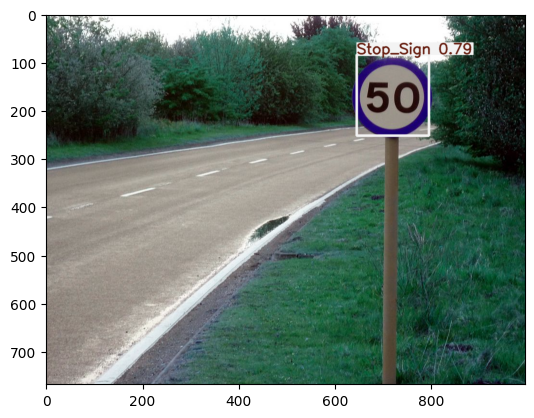

In [13]:
for result in results:
    plt.imshow(result.plot())  # result.plot() returns the image with bounding boxes
    plt.show()

In [14]:
label=20

In [15]:
class_names

['-Road narrows on right',
 '50 mph speed limit',
 'Attention Please-',
 'Beware of children',
 'CYCLE ROUTE AHEAD WARNING',
 'Dangerous Left Curve Ahead',
 'Dangerous Rright Curve Ahead',
 'End of all speed and passing limits',
 'Give Way',
 'Go Straight or Turn Right',
 'Go straight or turn left',
 'Keep-Left',
 'Keep-Right',
 'Left Zig Zag Traffic',
 'No Entry',
 'No_Over_Taking',
 'Overtaking by trucks is prohibited',
 'Pedestrian Crossing',
 'Round-About',
 'Slippery Road Ahead',
 'Speed Limit 20 KMPh',
 'Speed Limit 30 KMPh',
 'Stop_Sign',
 'Straight Ahead Only',
 'Traffic_signal',
 'Truck traffic is prohibited',
 'Turn left ahead',
 'Turn right ahead',
 'Uneven Road']

In [16]:
class_names[label]

'Speed Limit 20 KMPh'

In [17]:
img_2_path='test_1.jpg'
img_2=cv2.imread(img_2_path)

In [18]:
results = model(img_2)


0: 416x416 1 Pedestrian Crossing, 1 Speed Limit 20 KMPh, 201.3ms
Speed: 14.2ms preprocess, 201.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


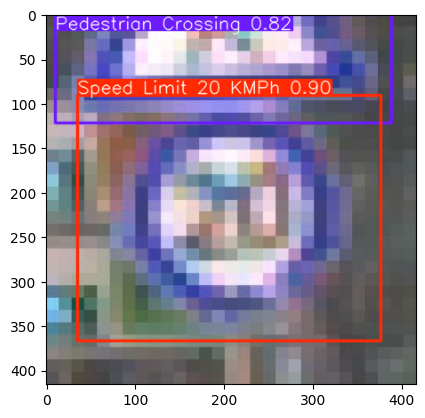

In [19]:
for result in results:
    plt.imshow(result.plot())  # result.plot() returns the image with bounding boxes
    plt.show()

In [39]:
# Get model layers

model_layers = model.model

# Forward pass without sigmoid
def get_logits(image):
    output = model_layers(image) 
    return output


image = torch.from_numpy(img_2).float()
image=image.permute(2,0,1)
image=image.unsqueeze(0)
logits = get_logits(image)
print(logits)

[tensor([[[[ 1.2164e+01, -3.2174e+00, -7.5449e+00,  ..., -5.9680e+00, -3.9726e+00, -1.3862e-01],
          [ 1.7774e+01, -3.7276e+00, -7.0948e+00,  ..., -2.6140e+00, -2.5732e-03,  3.4471e+00],
          [ 2.0088e+01, -4.3033e+00, -7.3972e+00,  ..., -1.1717e+00,  1.5229e+00,  4.4717e+00],
          ...,
          [ 2.5405e+01, -2.5147e+00, -2.7231e+00,  ..., -5.0621e+00, -1.3769e+00,  3.0289e+00],
          [ 2.3879e+01, -1.3033e+00, -1.5463e+00,  ..., -3.3703e+00, -2.5245e-01,  2.3219e+00],
          [ 1.8994e+01,  5.1115e+00,  3.7567e+00,  ...,  1.2343e+00,  3.0397e+00,  3.5547e+00]],

         [[ 1.2639e+01,  1.1918e+01, -2.6502e+00,  ..., -5.3215e+00, -1.4186e+00,  2.7239e+00],
          [ 1.6509e+01,  1.3124e+01, -4.0840e+00,  ..., -3.2611e+00,  1.2380e+00,  4.3491e+00],
          [ 1.8990e+01,  1.8259e+01, -4.2756e+00,  ..., -1.2330e+00,  2.7525e+00,  6.0933e+00],
          ...,
          [ 2.3295e+01,  1.7744e+01,  2.6282e+00,  ..., -3.0009e+00,  2.1644e+00,  7.3407e+00],
       

In [42]:

def generate_adversarial_example(model, image, label, epsilon):
 

    loss_fn = nn.CrossEntropyLoss()

    image.requires_grad = True
    label = torch.tensor([label]).to(image.device)  

    
    output = get_logits(image)
    print(output)

  
    loss = loss_fn(output, label)

   
    model.zero_grad()
    loss.backward()

   
    perturbation = epsilon * torch.sign(image.grad)

   
    adversarial_image = image + perturbation

    return adversarial_image


In [43]:

image = torch.from_numpy(img_2).float()
image=image.permute(2,0,1)
image=image.unsqueeze(0)

epsilon = 0.01


perturbed_image = generate_adversarial_example(model, image,label,epsilon) #label is 20


RuntimeError: Inference tensors cannot be saved for backward. To work around you can make a clone to get a normal tensor and use it in autograd.